In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.simplefilter('ignore')

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 867B-EBA9

 Directory of c:\Users\oztur\Desktop\AI Coruse\Project Level 2\Bart Project

22.08.2022  18:53    <DIR>          .
22.08.2022  18:53    <DIR>          ..
20.08.2022  19:14       350.218.878 archive.zip
22.08.2022  18:53           192.900 BART Project.ipynb
20.08.2022  19:18        11.088.900 BART project_2.pdf
22.08.2022  18:41           232.755 bart.ipynb
22.08.2022  18:39           680.626 logs.log
20.08.2022  12:35             6.695 qrcode_www.kaggle.com.png
03.01.2021  22:10               482 README.txt
20.08.2022  19:17    <DIR>          ridership
               7 File(s)    362.421.236 bytes
               3 Dir(s)  93.003.055.104 bytes free


![bart](bart.jpeg)

In [4]:
df =pd.read_csv("ridership\date-hour-soo-dest-2016.csv")
df.shape

(9973662, 5)

In [5]:
stations = pd.read_excel("Station_Names.xls")
del stations['Unnamed: 0']
stations.head(50)

FileNotFoundError: [Errno 2] No such file or directory: 'Station_Names.xls'

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9973662 entries, 0 to 9973661
Data columns (total 5 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   Date                 object
 1   Hour                 int64 
 2   Origin Station       object
 3   Destination Station  object
 4   Trip Count           int64 
dtypes: int64(2), object(3)
memory usage: 380.5+ MB


In [7]:
df.head()

,Date,Hour,Origin Station,Destination Station,Trip Count
0,2016-01-01,0,12TH,12TH,1
1,2016-01-01,0,12TH,16TH,1
2,2016-01-01,0,12TH,24TH,4
3,2016-01-01,0,12TH,ASHB,4
4,2016-01-01,0,12TH,BALB,2


In [8]:
df.isnull().sum() # verimiz tamamen dolu :)

Date                   0
Hour                   0
Origin Station         0
Destination Station    0
Trip Count             0
dtype: int64

In [9]:
import datetime as dt
df['Date'] = pd.to_datetime(df['Date'])
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

df['weekday'] = df['Date'].dt.day_name()
df['month_name'] = df['Date'].dt.month_name()

del df["Date"]
del df["year"] # bütün veri 2020 ye ait zaten

In [10]:
df["Hour"].unique() # 0 değerini 24 olarak da alacağız

array([ 0,  1,  2,  3,  4,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23,  5], dtype=int64)

**Data Analytics Questions**
- Which BART station is the busiest?
- What is the least popular BART route?
- When is the best time to go to SF from Berkeley if you want to find a seat?
- Which day of the week is the busiest?
- How many people take the BART late at night?

**Which BART station is the busiest?**
- Answer: as it is visible on the chart or these value counts the busiest station is POWL=Powell Street

In [12]:
df["Origin Station"].value_counts(ascending=False)

POWL    317499
CIVC    310691
EMBR    310273
MONT    307554
16TH    284374
DBRK    279054
12TH    278793
24TH    278243
19TH    274650
SFIA    267183
MCAR    266269
FTVL    255512
COLS    247071
DALY    246249
DELN    241078
BALB    238207
LAKE    236272
FRMT    233508
GLEN    228432
SANL    226457
ASHB    219697
BAYF    217926
CONC    216681
PITT    216576
WCRK    214820
HAYW    214603
WOAK    212608
RICH    209012
DUBL    207497
ROCK    206736
NBRK    198835
PLZA    197531
PHIL    194092
MLBR    193475
UCTY    181288
SBRN    177110
SHAY    168344
OAKL    166872
COLM    158373
WDUB    155513
SSAN    154818
LAFY    150349
CAST    149187
ORIN    137284
NCON    127030
WARM        36
Name: Origin Station, dtype: int64

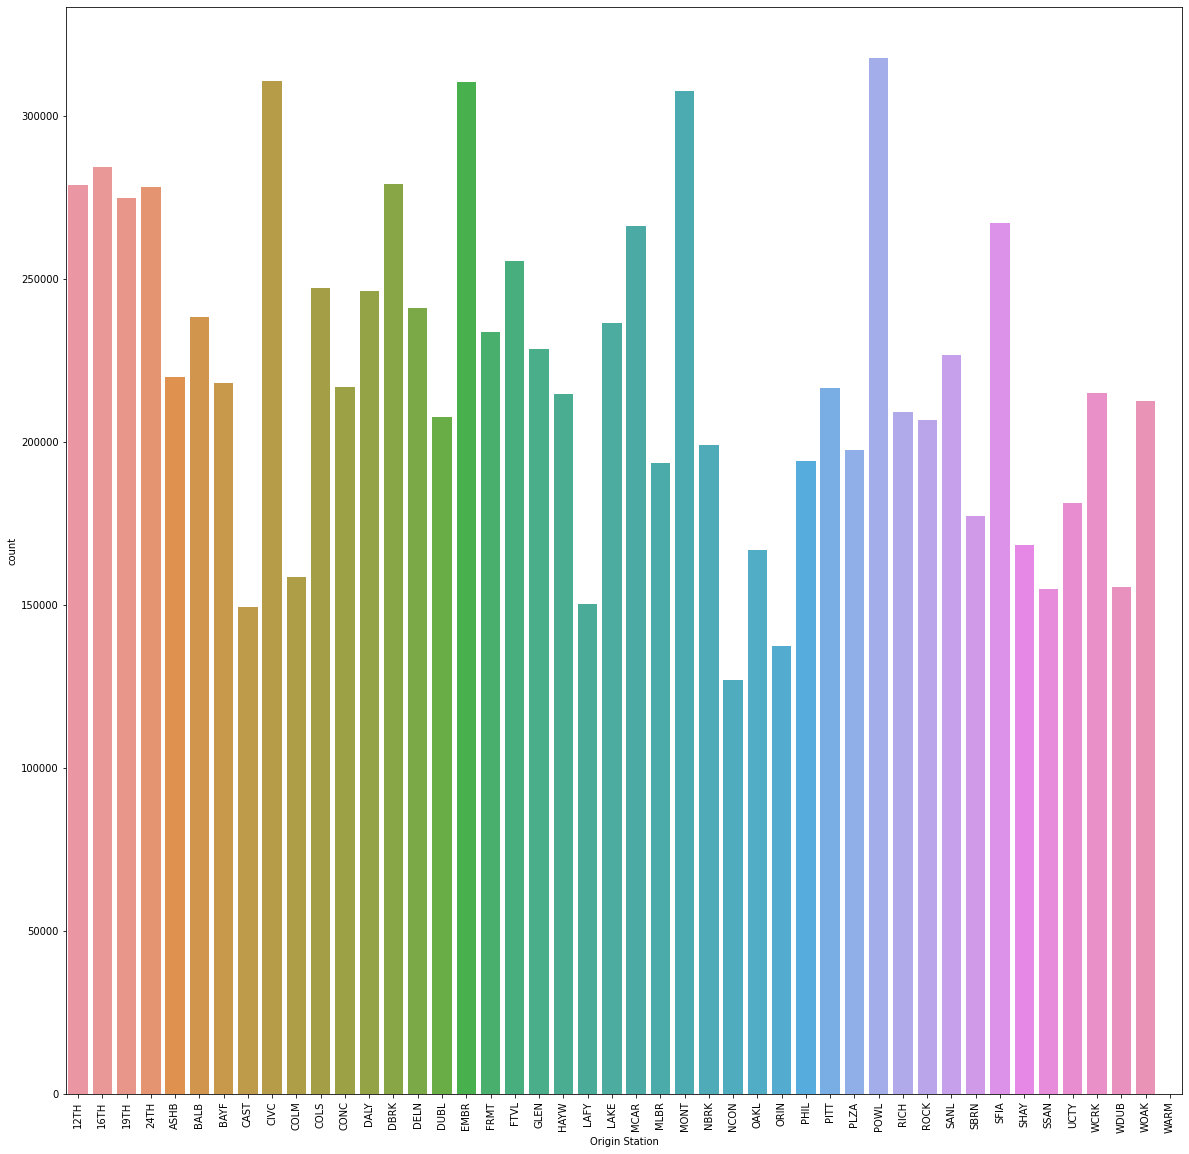

In [13]:
fig = plt.figure(figsize=(20,20))
chart = sns.countplot(df["Origin Station"])
chart.set_xlabel("Origin Station")
plt.xticks(rotation = 90);

**What is the least popular BART route?**
- Answer: the leas popular station is Milpitas = ML or MLPT

In [14]:
fig = plt.figure(figsize=(20,20))
chart = sns.barplot(x=df["Destination Station"],y=df["Trip Count"])
chart.set_xlabel("Destination Station")
chart.set_ylabel("Trip Count")
chart.set_title("Least Popular Station")
plt.xticks(rotation = 90);

KeyboardInterrupt: 

<Figure size 1440x1440 with 0 Axes>

**When is the best time to go to SF from Berkeley if you want to find a seat?**
- Answer: the least trip count is at 3 and 4 am that means not so much people use the BART at these two hours so if someone would use BART to go SF from Berkeley these hours would be the best option to find a seat.

In [15]:
df['Origin Station'].unique()

array(['12TH', '16TH', '19TH', '24TH', 'ASHB', 'BALB', 'BAYF', 'CAST',
       'CIVC', 'COLM', 'COLS', 'CONC', 'DALY', 'DBRK', 'DELN', 'DUBL',
       'EMBR', 'FRMT', 'FTVL', 'GLEN', 'HAYW', 'LAFY', 'LAKE', 'MCAR',
       'MLBR', 'MONT', 'NBRK', 'NCON', 'OAKL', 'ORIN', 'PHIL', 'PITT',
       'PLZA', 'POWL', 'RICH', 'ROCK', 'SANL', 'SBRN', 'SFIA', 'SHAY',
       'SSAN', 'UCTY', 'WCRK', 'WDUB', 'WOAK', 'WARM'], dtype=object)

In [16]:
df['Destination Station'].unique()

array(['12TH', '16TH', '24TH', 'ASHB', 'BALB', 'BAYF', 'CIVC', 'CONC',
       'DBRK', 'DELN', 'DUBL', 'EMBR', 'FTVL', 'LAFY', 'LAKE', 'MCAR',
       'MONT', 'NBRK', 'ORIN', 'PHIL', 'PITT', 'PLZA', 'POWL', 'ROCK',
       'SANL', 'SBRN', 'SHAY', 'WCRK', 'WOAK', '19TH', 'COLM', 'COLS',
       'DALY', 'GLEN', 'MLBR', 'NCON', 'RICH', 'SSAN', 'UCTY', 'WDUB',
       'CAST', 'HAYW', 'SFIA', 'FRMT', 'OAKL', 'WARM'], dtype=object)

In [17]:
civic_center=df[df['Destination Station']=='CIVC']

In [18]:
berkeley = df[df['Origin Station']=='DBRK']

In [19]:
civic_center.head()

,Hour,Origin Station,Destination Station,Trip Count,day,month,weekday,month_name
6,0,12TH,CIVC,7,1,1,Friday,January
36,0,16TH,CIVC,22,1,1,Friday,January
73,0,19TH,CIVC,2,1,1,Friday,January
110,0,24TH,CIVC,15,1,1,Friday,January
136,0,ASHB,CIVC,2,1,1,Friday,January


In [20]:
berkeley.head()

,Hour,Origin Station,Destination Station,Trip Count,day,month,weekday,month_name
276,0,DBRK,12TH,2,1,1,Friday,January
277,0,DBRK,16TH,2,1,1,Friday,January
278,0,DBRK,19TH,1,1,1,Friday,January
279,0,DBRK,ASHB,13,1,1,Friday,January
280,0,DBRK,COLS,2,1,1,Friday,January


In [21]:
bk_to_cc=df[(df['Destination Station']=='CIVC') & (df['Origin Station']=='DBRK')]

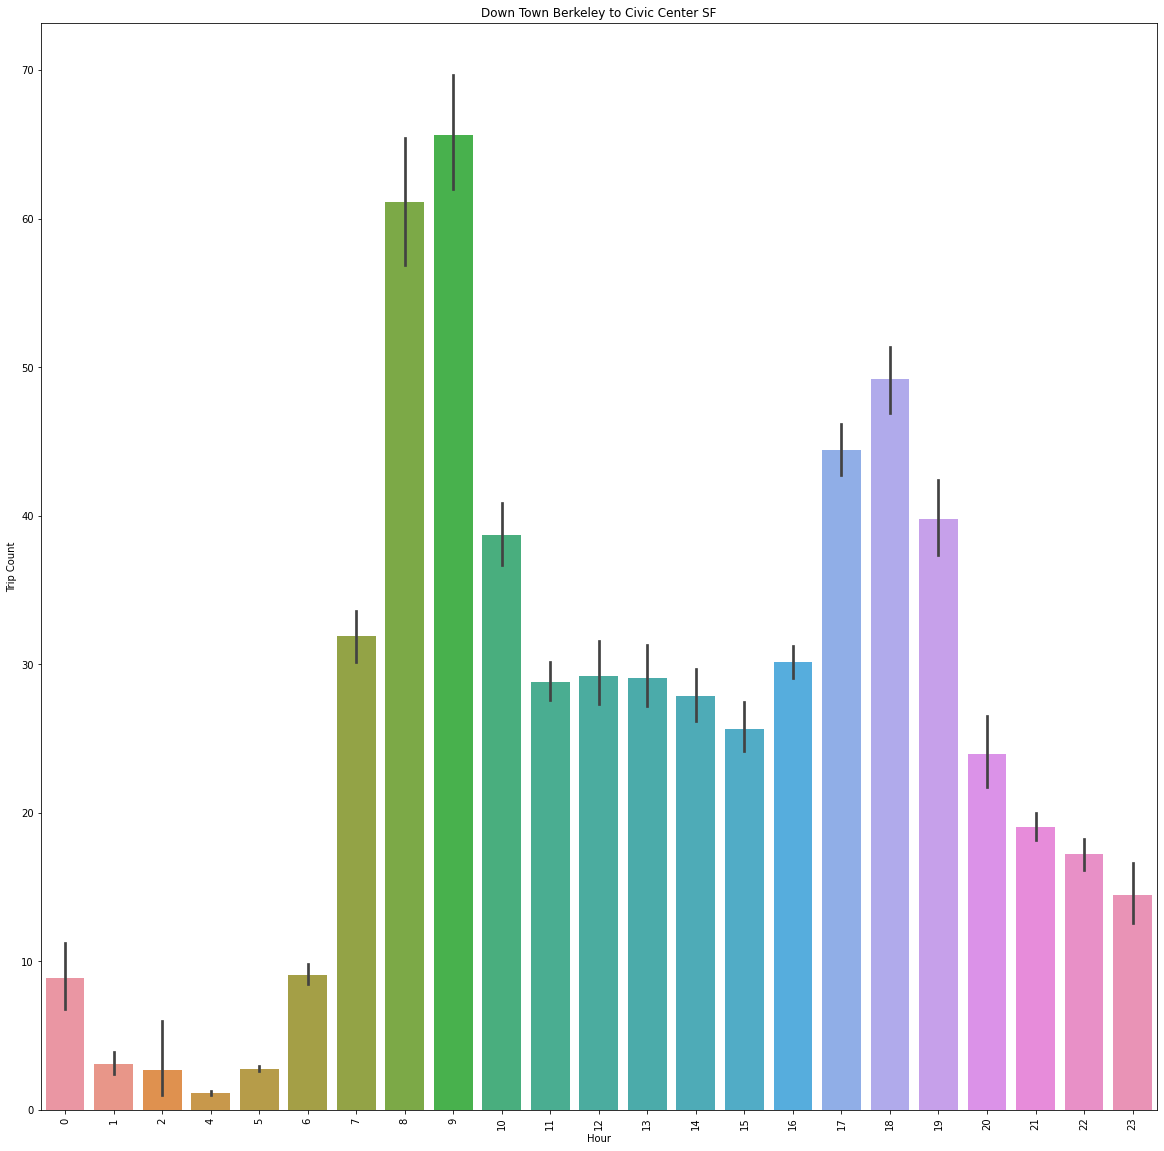

In [22]:
fig = plt.figure(figsize=(20,20))
chart = sns.barplot(x=bk_to_cc["Hour"],y=bk_to_cc["Trip Count"])
chart.set_xlabel("Hour")
chart.set_ylabel("Trip Count")
chart.set_title("Down Town Berkeley to Civic Center SF")
plt.xticks(rotation = 90);

**Which day of the week is the busiest?**
- Answer: the busiest day of the week is Thursday

In [23]:
sns.countplot(x=df["weekday"])
plt.xticks(rotation=90);

KeyboardInterrupt: 

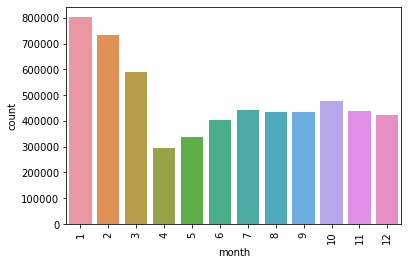

In [ ]:
sns.countplot(x=df["month"])
plt.xticks(rotation=90);

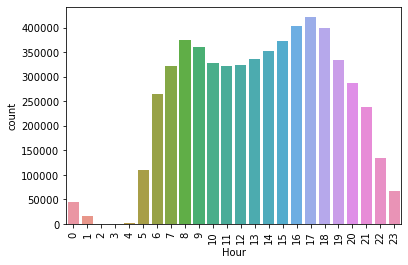

In [ ]:
sns.countplot(x=df["Hour"])
plt.xticks(rotation=90);

**How many people take the BART late at night?**
- Answer: It is hard to answer this question with this datset but if we look at the trip counts,the count of  people that uses BART at night during the year is 435.917 and also the busiest hour between these four is 2 am

In [ ]:
late = df[df['Hour']<3]
at_night = df[df['Hour']>22]
late_at_night = late.append(at_night)
late_at_night.head()

,Hour,Origin Station,Destination Station,Trip Count,day,month,weekday,month_name
0,0,12TH,16TH,5,1,1,Wednesday,January
1,0,12TH,24TH,3,1,1,Wednesday,January
2,0,12TH,ASHB,6,1,1,Wednesday,January
3,0,12TH,BAYF,1,1,1,Wednesday,January
4,0,12TH,CIVC,3,1,1,Wednesday,January


In [ ]:
late_at_night['Hour'].unique()

array([ 0,  1,  2, 23])

In [ ]:
late_at_night['Trip Count'].sum()

435917

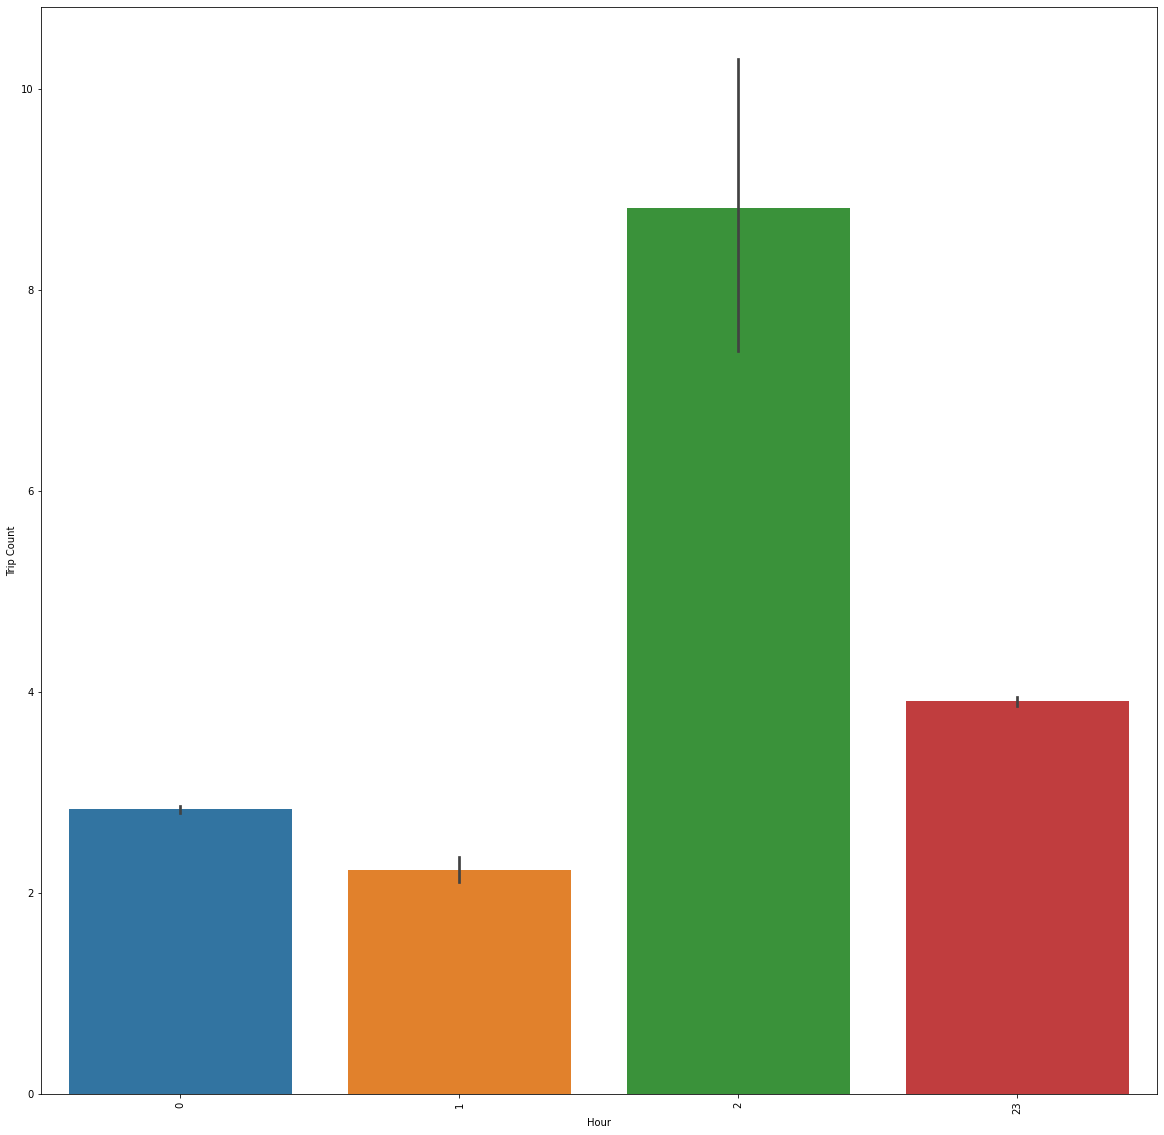

In [ ]:
fig = plt.figure(figsize=(20,20))
chart = sns.barplot(x=late_at_night["Hour"],y=late_at_night["Trip Count"])
chart.set_xlabel("Hour")
chart.set_ylabel("Trip Count")
plt.xticks(rotation = 90);

**ML**

In [26]:
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [27]:
x=df[['day']]
y=df['Trip Count']

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=13)

In [29]:
gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)
y_pred_gbr = gbr.predict(x_test)

In [30]:
(mean_squared_error(y_test,y_pred_gbr))**0.5

33.610477548020626

In [31]:
(r2_score(y_test,y_pred_gbr))

0.00026780069752763147

In [32]:
xgb=XGBRegressor()
xgb.fit(x_train, y_train)
y_pred_xgb = xgb.predict(x_test)

In [33]:
(mean_squared_error(y_test,y_pred_xgb))**0.5

33.6104823029066

In [34]:
(r2_score(y_test,y_pred_xgb))

0.0002675178325823868